In [ ]:
! pip install -q torchview
! pip install -q -U graphviz
! pip install ptflops

In [ ]:
from ptflops import get_model_complexity_info

In [ ]:
# Andrew Ng recommends to perform batch norm before relu

import torch
import torch.nn as nn
from torch import Tensor
import torch.nn.functional as F
from torchsummary import summary
from torchsummary import summary
from torchview import draw_graph
from torchvision.models import resnet18, GoogLeNet, densenet, vit_b_16
# when running on VSCode run the below command
# svg format on vscode does not give desired result
import graphviz
graphviz.set_jupyter_format('png')
import matplotlib.pyplot as plt


In [ ]:
use_cuda = torch.cuda.is_available()
print('use_cuda: {}'.format(use_cuda))
device = torch.device("cuda" if use_cuda else "cpu")
print("Device to be used : ",device)

use_cuda: False
Device to be used :  cpu


### Sourish's question

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary



class ffnn(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(5, 10)
        self.out = nn.Linear(10, 3)
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        x = self.fc1(x)
        x = self.out(x)
        x = self.sigmoid(x)
        return x

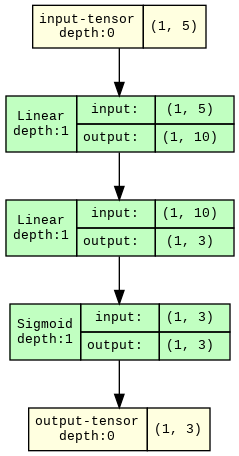

In [ ]:
model = ffnn()
model_graph1 = draw_graph(model, input_size=(1,5),  expand_nested=True)
model_graph1.visual_graph.render(format='png')
model_graph1.visual_graph

In [ ]:
summary(model, input_size=(1,5))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 10]              60
            Linear-2                 [-1, 1, 3]              33
           Sigmoid-3                 [-1, 1, 3]               0
Total params: 93
Trainable params: 93
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


## First example

In [ ]:
# First dimension is for batch, then channel then height-width
input_tensor = torch.randn(1,1,1,3072)
print("input_tensor => ",input_tensor.shape)
conv_layer = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3072)
output_tensor = conv_layer(input_tensor)
print("output_tensor shape => ",output_tensor.shape)

input_tensor =>  torch.Size([1, 1, 1, 3072])


RuntimeError: Calculated padded input size per channel: (1 x 3072). Kernel size: (3072 x 3072). Kernel size can't be greater than actual input size

## Second example

In [ ]:
# Create a tensor of size 1x3072
input_tensor = torch.randn(1, 1, 1, 3072)
print("shape of input tensor => ",input_tensor.shape)
# Create a linear layer with input size 3072 and output size 10
linear_layer = nn.Linear(3072, 10)

# Reshape the input tensor to match the expected input size of the linear layer
input_tensor = input_tensor.view(1, -1)
print("shape of input tensor => ",input_tensor.shape)
# Apply the linear layer to the reshaped input tensor
output_tensor = linear_layer(input_tensor)

# Print the result
print(output_tensor.shape)

shape of input tensor =>  torch.Size([1, 1, 1, 3072])
shape of input tensor =>  torch.Size([1, 3072])
torch.Size([1, 10])


### Third example

In [ ]:
# First dimension is for batch, then channel then height-width
input_tensor = torch.randn(1, 3, 32, 32)
print("input_tensor => ",input_tensor.shape)
conv_layer = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=5)
output_tensor = conv_layer(input_tensor)
print("output_tensor shape => ",output_tensor.shape)

input_tensor =>  torch.Size([1, 3, 32, 32])
output_tensor shape =>  torch.Size([1, 1, 28, 28])


#### Parameters

In [ ]:
for name, param in conv_layer.named_parameters():
    print(f"{name}: {param.shape}")


weight: torch.Size([1, 3, 5, 5])
bias: torch.Size([1])


#### 6-channel output

In [ ]:
# First dimension is for batch, then channel then height-width
input_tensor = torch.randn(1, 3, 32, 32)
print("input_tensor => ",input_tensor.shape)
conv_layer = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
output_tensor = conv_layer(input_tensor)
print("output_tensor shape => ",output_tensor.shape)

input_tensor =>  torch.Size([1, 3, 32, 32])
output_tensor shape =>  torch.Size([1, 6, 28, 28])


In [ ]:
for name, param in conv_layer.named_parameters():
    print(f"{name}: {param.shape}")


weight: torch.Size([6, 3, 5, 5])
bias: torch.Size([6])


#### 6-channel output, batch size = 3

In [ ]:
# First dimension is for batch, then channel then height-width
input_tensor = torch.randn(3, 3, 32, 32)
print("input_tensor => ",input_tensor.shape)
conv_layer = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
output_tensor = conv_layer(input_tensor)
print("output_tensor shape => ",output_tensor.shape)

input_tensor =>  torch.Size([3, 3, 32, 32])
output_tensor shape =>  torch.Size([3, 6, 28, 28])


In [ ]:
# No. of paramters remains the same whatever be the batch size
for name, param in conv_layer.named_parameters():
    print(f"{name}: {param.shape}")


weight: torch.Size([6, 3, 5, 5])
bias: torch.Size([6])


#### Stride = 1

In [ ]:
# First dimension is for batch, then channel then height-width
input_tensor = torch.randn(1, 1, 7, 7)
print("input_tensor => ",input_tensor.shape)
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1)
output_tensor = conv_layer(input_tensor)
print("output_tensor shape => ",output_tensor.shape)

input_tensor =>  torch.Size([1, 1, 7, 7])
output_tensor shape =>  torch.Size([1, 1, 5, 5])


#### Stride = 2

In [ ]:
# First dimension is for batch, then channel then height-width
input_tensor = torch.randn(1, 1, 7, 7)
print("input_tensor => ",input_tensor.shape)
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=2)
output_tensor = conv_layer(input_tensor)
print("output_tensor shape => ",output_tensor.shape)

input_tensor =>  torch.Size([1, 1, 7, 7])
output_tensor shape =>  torch.Size([1, 1, 3, 3])


#### Stride = 3

In [ ]:
# First dimension is for batch, then channel then height-width
input_tensor = torch.randn(1, 1, 7, 7)
print("input_tensor => ",input_tensor.shape)
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=3)
output_tensor = conv_layer(input_tensor)
print("output_tensor shape => ",output_tensor.shape)

input_tensor =>  torch.Size([1, 1, 7, 7])
output_tensor shape =>  torch.Size([1, 1, 2, 2])


In [ ]:
# First dimension is for batch, then channel then height-width
input_tensor = torch.randn(1, 1, 7, 7)
print("input_tensor => ",input_tensor.shape)
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=3, padding=1)
output_tensor = conv_layer(input_tensor)
print("output_tensor shape => ",output_tensor.shape)

input_tensor =>  torch.Size([1, 1, 7, 7])
output_tensor shape =>  torch.Size([1, 1, 3, 3])


### Now with an advanced CNN

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary



class ffcnn(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=3)
        self.bn2d = nn.BatchNorm2d(3)
        self.maxpool = nn.MaxPool2d(2)
        self.flatten = torch.nn.Flatten()
        self.fc1 = nn.Linear(48, 10)
        self.bn1d = nn.BatchNorm1d(10)
        self.out = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.bn2d(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.bn1d(x)
        x = self.out(x)
        x = self.sigmoid(x)
        return x

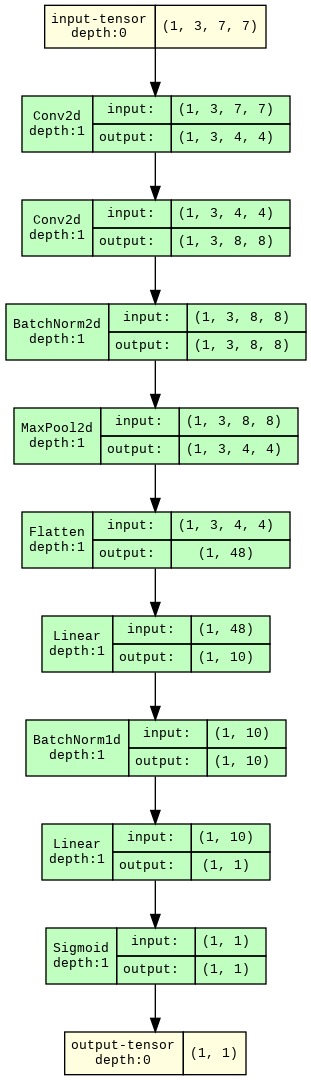

In [ ]:
model = ffcnn()
model_graph1 = draw_graph(model, input_size=(1,3,7,7),  expand_nested=True)
model_graph1.visual_graph.render(format='png')
model_graph1.visual_graph

In [ ]:
summary(model, input_size=(3,7,7))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1              [-1, 3, 4, 4]              84
            Conv2d-2              [-1, 3, 8, 8]              84
       BatchNorm2d-3              [-1, 3, 8, 8]               6
         MaxPool2d-4              [-1, 3, 4, 4]               0
           Flatten-5                   [-1, 48]               0
            Linear-6                   [-1, 10]             490
       BatchNorm1d-7                   [-1, 10]              20
            Linear-8                    [-1, 1]              11
           Sigmoid-9                    [-1, 1]               0
Total params: 695
Trainable params: 695
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
---------------------------------------------------